In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from scipy.optimize import minimize
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
#https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125

df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/KidCreative.csv',encoding = "ISO-8859-1")
df=df.drop(columns=['Obs No.'])

print(df.shape)
print(df.info())

print(df.isnull().sum())

(673, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Buy               673 non-null    int64
 1   Income            673 non-null    int64
 2   Is Female         673 non-null    int64
 3   Is Married        673 non-null    int64
 4   Has College       673 non-null    int64
 5   Is Professional   673 non-null    int64
 6   Is Retired        673 non-null    int64
 7   Unemployed        673 non-null    int64
 8   Residence Length  673 non-null    int64
 9   Dual Income       673 non-null    int64
 10  Minors            673 non-null    int64
 11  Own               673 non-null    int64
 12  House             673 non-null    int64
 13  White             673 non-null    int64
 14  English           673 non-null    int64
 15  Prev Child Mag    673 non-null    int64
 16  Prev Parent Mag   673 non-null    int64
dtypes: int64(17)
memory usage

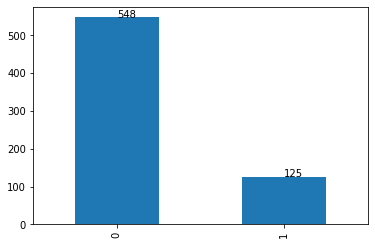

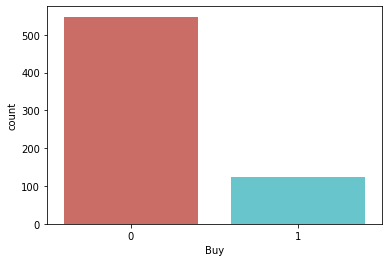

In [44]:
yes=y[y==1]
no=y[y==0]

df['Buy'].value_counts().plot(x = 'Buy',kind='bar')

plt.annotate(str(len(no)), xy=(0,len(no)))
plt.annotate(str(len(yes)), xy=(1,len(yes)))

plt.show()


df.Buy.value_counts()
sns.countplot(x = 'Buy', data = df, palette = 'hls')

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


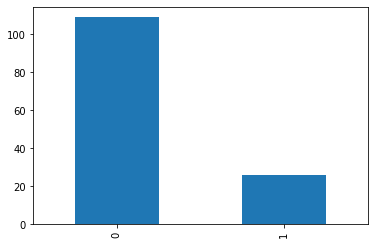

In [55]:
X = df[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']]
y = df['Buy']

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lr=LogisticRegression(C=100)

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

buffer=pd.Series(y_pred)
buffer.value_counts().plot(kind='bar')
plt.show()

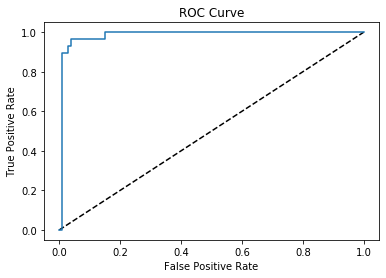

Log Loss is %s 0.17159193680736246


In [56]:
y_pred_prob=lr.predict_proba(X_test)[:,1]
fpr, tpr, threshholds = roc_curve(y_test,y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value
loss = log_loss(y_test, y_pred_prob)
print("Log Loss is %s",loss)

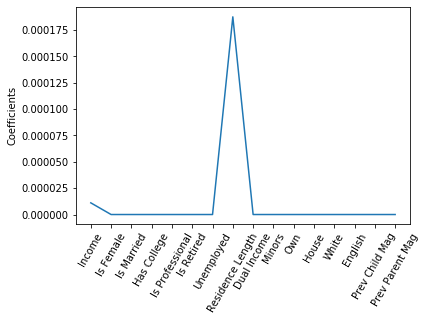

In [57]:
names=['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_

_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [58]:
print(confusion_matrix(y_test,y_pred))
# true positive     true negative
# false negative    false positive
print("Accuracy is %s",lr.score(X_test,y_test)*100)

[[105   1]
 [  4  25]]
Accuracy is %s 96.29629629629629
